## 밤시간에 전기사용량이 많은 게 EV때문일까?

In [1]:
import os
os.chdir('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from module.util_main import downsampling, dim_reduct
from collections import defaultdict
font = {'size': 16, 'family':"Malgun Gothic"}
matplotlib.rc('font', **font)

from pathlib import Path

# 에너지 데이터 로드
SAVE = pd.read_csv('data/SAVE/power_0428.csv', index_col=0)
SAVE = SAVE.iloc[84:,:]
SAVE.index = pd.to_datetime(SAVE.index)
SAVE[SAVE == 0] = np.nan

# 라벨 
SAVE_label = pd.read_csv('data/SAVE/save_household_survey_data_v0-3.csv', index_col = 0)
# Interviedate가 빠른 순으로 정렬
SAVE_label.sort_values('InterviewDate', inplace = True)
SAVE_label = SAVE_label.T
SAVE_label.columns = SAVE_label.columns.astype(str)

helper_dict = defaultdict(list)
for col in SAVE.columns:
    helper_dict[col[2:]].append(col)

# 동일 집끼리 병합
drop_cols = []
invalid_idx_list = []
for key,value in helper_dict.items():
    if len(value) >= 2:
        valid_idx_1 = ~pd.isnull(SAVE[value[1]])

        # replace value
        SAVE[value[0]][valid_idx_1] = SAVE[value[1]][valid_idx_1]

        # delete remain
        drop_cols.append(value[1])

# drop cols
SAVE.drop(columns = drop_cols, inplace = True)

# label과 data의 column 맞춤
SAVE.columns = [c[2:] for c in SAVE.columns]

print('Done')

Done


### EV 보유가정과 미보유가정의 분포 차이 분석

In [11]:
from module.util_save import matching_id

data_f, label_f = matching_id(SAVE, SAVE_label, 'Q6_1')

start_date = pd.to_datetime('2017-04-01 00:00:00')
end_date = pd.to_datetime('2017-05-01 23:00:00')

# dim reduct
data_1 = data_f.loc[start_date:end_date,label_f == 1].values
data_1, _ = dim_reduct(data_1, 24*4, 0)
data_1 = downsampling(data_1, 4)

data_2 = data_f.loc[start_date:end_date,label_f == 2].values
data_2, _ = dim_reduct(data_2, 24*4, 0)
data_2 = downsampling(data_2, 4)

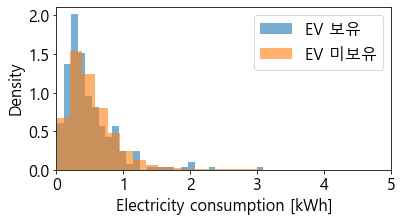

In [12]:
plt.figure(figsize = (6,3))
plt.title('')
plt.hist(data_1[:,0:6].reshape(-1), label = 'EV 보유', bins = 30, alpha = 0.6, density = True)
plt.hist(data_2[:,0:6].reshape(-1), label = 'EV 미보유', bins = 30, alpha = 0.6, density = True)
plt.ylabel('Density')
plt.xlabel('Electricity consumption [kWh]')
plt.legend()
plt.xlim(0, 5)
plt.show()